# PML-CAP10-Gaussian Naive Bayes  - Spam

In [1]:
import pandas as pd
df=pd.read_csv("csv/spam.csv", engine='python')
df.head(9)
dfX=df['v2']
dfY=df['v1']

### Count types

In [2]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

### Split Data

In [3]:
from sklearn.model_selection import train_test_split
X=dfX
Y=dfY
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2, random_state = 1234)

### Vectorize Data

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=2,max_features=200,max_df=0.50,stop_words=["my","me","to","your","you","all","in","the","is","and"])
train_x_vector = vectorizer.fit_transform(train_x.values)
test_x_vector = vectorizer.transform(test_x.values)

### Plot Words Vocabulary and word list - Install pip install wordcloud

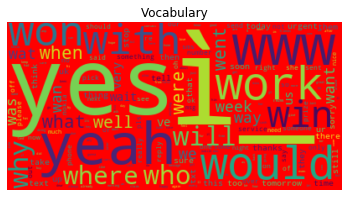

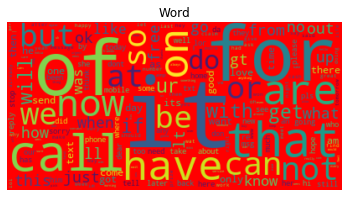

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_vector_words = pd.DataFrame(train_x_vector.toarray(), columns=vectorizer.get_feature_names())
wc = WordCloud(background_color="red", repeat=True)
wc.generate_from_frequencies(vectorizer.vocabulary_)
plt.title('Vocabulary')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()
word_list_s = vectorizer.get_feature_names();    
count_list_s = train_x_vector.toarray().sum(axis=0) 
word_total = dict(zip(word_list_s,count_list_s))
wc.generate_from_frequencies(word_total)
plt.title('Word')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

### Plot Ham and Spam

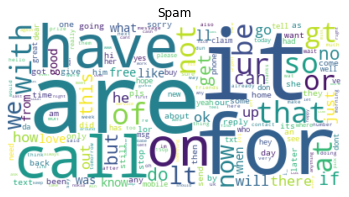

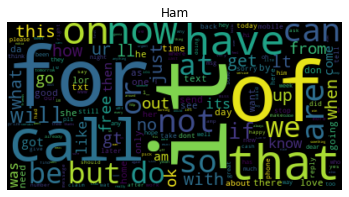

In [8]:
import math
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pd_words_type = pd.concat([dfY,df_vector_words],axis=1)
pd_words_type_aggregate = pd_words_type.groupby('v1').agg('sum')
pd_total_words_type=pd_words_type_aggregate.T.reset_index()
pd_total_words_type.columns = ['word','ham','spam']
pd_words_ham = dict(zip(pd_total_words_type['word'],pd_total_words_type['ham']))
wc.generate_from_frequencies(pd_words_ham)
pd_words_spam = dict(zip(pd_total_words_type['word'],pd_total_words_type['spam']))
wc = WordCloud(background_color="white", repeat=True)
wc.generate_from_frequencies(pd_words_spam)
plt.title('Spam')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()
wc = WordCloud(background_color="black", repeat=True)
wc.generate_from_frequencies(pd_words_ham)
plt.title('Ham')
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

### Train Model

In [9]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(train_x_vector,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Predict Model

In [10]:
pred_EY=model.predict(test_x_vector)

### Metrics

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
display(confusion_matrix(test_y,pred_EY))
print(classification_report(test_y,pred_EY))

array([[930,  13],
       [ 15, 157]], dtype=int64)

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       943
        spam       0.92      0.91      0.92       172

    accuracy                           0.97      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.97      0.97      0.97      1115



### Examples Spam

In [12]:
email_spam=["Free entry in 2 a wkly comp to win FA Cup final"]
email_spam_vector = vectorizer.transform(email_spam)
pred_email = model.predict(email_spam_vector)
print(pred_email)
email_spam=["Please confirm by replying YES or NO"]
email_spam_vector = vectorizer.transform(email_spam)
pred_email = model.predict(email_spam_vector)
print(pred_email)
email_spam=["Your free ringtone is waiting to be collected"]
email_spam_vector = vectorizer.transform(email_spam)
pred_email = model.predict(email_spam_vector)
print(pred_email)

['spam']
['spam']
['spam']


### Examples Ham

In [14]:
email_ham=["Hello my friend"]
email_ham_vector = vectorizer.transform(email_ham)
pred_email = model.predict(email_ham_vector)
print(pred_email)
email_ham=["I'm still looking for a car to buy. And have not gone 4the driving test yet."]
email_ham_vector = vectorizer.transform(email_ham)
pred_email = model.predict(email_ham_vector)
print(pred_email)

['ham']
['ham']
